In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
df_original = pd.read_csv('../data/segmentation_data.csv').drop('ID', axis=1)
df_original

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [24]:
df = pd.read_csv('../data/filtered_data.csv')
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,1,22,1,150773,1,2
1,0,0,49,1,89210,0,0
2,0,0,45,1,171565,1,1
3,0,0,53,1,149031,1,1
4,0,0,35,1,144848,0,0
...,...,...,...,...,...,...,...
1863,1,0,47,1,123525,0,0
1864,1,1,27,1,117744,1,0
1865,0,0,31,0,86400,0,0
1866,1,1,24,1,97968,0,0


In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.066443,0.991471,-1.230102,0.013739,1.186570,0.385436,1.620266
1,-0.937697,-1.008602,1.376024,0.013739,-0.891570,-1.258387,-0.872862
2,-0.937697,-1.008602,0.989931,0.013739,1.888432,0.385436,0.373702
3,-0.937697,-1.008602,1.762116,0.013739,1.127767,0.385436,0.373702
4,-0.937697,-1.008602,0.024699,0.013739,0.986564,-1.258387,-0.872862
...,...,...,...,...,...,...,...
1863,1.066443,-1.008602,1.182977,0.013739,0.266778,-1.258387,-0.872862
1864,1.066443,0.991471,-0.747486,0.013739,0.071633,0.385436,-0.872862
1865,-0.937697,-1.008602,-0.361394,-1.819386,-0.986425,-1.258387,-0.872862
1866,1.066443,0.991471,-1.037056,0.013739,-0.595932,-1.258387,-0.872862


# Encontrando o número adequado de clusters

## Elbow method

In [26]:
# Método elbow

erro = []
score_silhueta = []



for i in range(2,21):
#     pipeline = Pipeline(
#         [
#             ('scaler', StandardScaler()),
#             ('kmeans', KMeans(n_clusters=i, random_state=42))
#         ]
#     )
    
    model = KMeans(n_clusters=i, random_state=42)
    #clusters = pipeline.fit_predict(df)
    clusters = model.fit_predict(df_scaled)
    #erro.append(pipeline.named_steps['kmeans'].inertia_)
    erro.append(model.inertia_)
    score_silhueta.append(silhouette_score(df_scaled, clusters))

erro
score_silhueta

[0.24272669084907486,
 0.2365814744697906,
 0.2700489585300145,
 0.246696956501883,
 0.2643120780970563,
 0.287278939733409,
 0.29485800916831395,
 0.29226339021619224,
 0.30406268099491573,
 0.3215416598229467,
 0.32465194504999006,
 0.31555640586379663,
 0.3441053233522932,
 0.3434450856774885,
 0.3510934772048201,
 0.3549007532598555,
 0.36379531411317717,
 0.35255731571622595,
 0.3709883833341655]

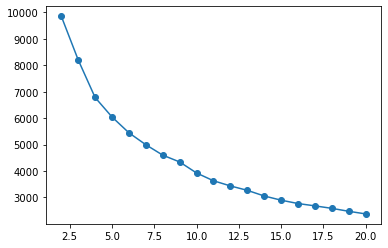

In [27]:
plt.scatter(range(2,21), erro)
plt.plot(range(2,21), erro)

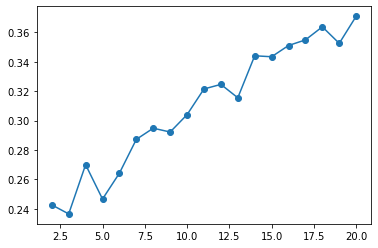

In [28]:
plt.scatter(range(2,21), score_silhueta)
plt.plot(range(2,21), score_silhueta)

# Treinando modelo com k = 4

In [29]:
#model = KMeans(n_clusters=5, random_state=42)
#clusters = model.fit_predict(df_scaled)
#clusters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

In [30]:
pipe.fit(df)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [31]:
#df['Cluster'] = clusters+1
#df

df_original['Cluster'] = pipe.predict(df_original)
df_original['Cluster'] = df_original['Cluster'] + 1
df_original

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,4
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,3
1998,1,1,24,1,97968,0,0,1


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pipe_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca)
])

pca_data = pipe_pca.fit_transform(df_original.drop('Cluster', axis=1))

df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

df_pca

#pca_data = pca.fit_transform(df_scaled)

#df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

#df_pca

,PCA1,PCA2,PCA3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


In [41]:
import plotly.express as px

fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3',
              color=df_original['Cluster'])
fig.show()

# Analisando clusters

In [42]:
numerical = ['Age', 'Income']

## Cluster 1

In [43]:
cluster = df_original[df_original['Cluster'] == 1]
cluster

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,1,1,22,1,150773,1,2,1
10,1,1,25,1,108469,1,0,1
11,1,1,24,1,127596,1,0,1
12,1,1,22,1,108687,1,2,1
14,1,1,28,1,102899,1,1,1
...,...,...,...,...,...,...,...,...
1988,1,1,35,1,124447,0,0,1
1989,1,1,25,1,106567,0,0,1
1990,1,1,31,1,78758,0,0,1
1996,1,1,27,1,117744,1,0,1


<AxesSubplot:>

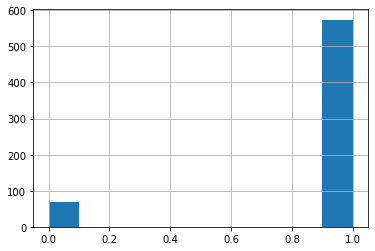

In [44]:
cluster['Sex'].hist()

<AxesSubplot:>

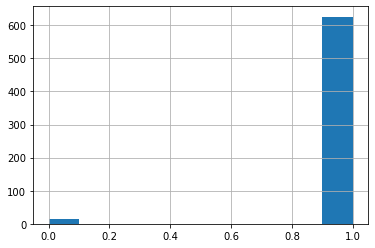

In [45]:
cluster['Marital status'].hist()

<AxesSubplot:>

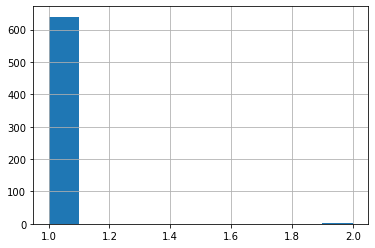

In [46]:
cluster['Education'].hist()

<AxesSubplot:>

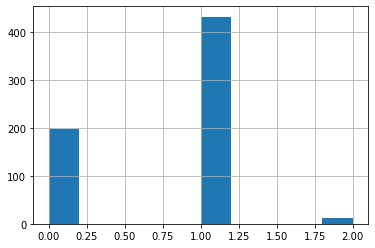

In [47]:
cluster['Occupation'].hist()

<AxesSubplot:>

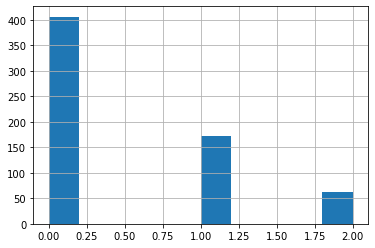

In [48]:
cluster['Settlement size'].hist()

In [49]:
cluster[numerical].describe()

,Age,Income
count,642.000000,642.000000
mean,27.739875,107847.295950
std,4.962505,24587.691668
min,18.000000,35832.000000
25%,24.000000,95162.000000
50%,27.000000,107400.000000
75%,31.000000,121461.750000
max,43.000000,207262.000000


## Persona cluster 1

- **Mulher**
- **27 anos**
- **Não solteira**
- **Formada no High School**
- **Mora em cidade pequena**
- **Assalariada**
- **Salário de 107K**

In [50]:
cluster2 = df_original[df_original['Cluster'] == 2]
cluster3 = df_original[df_original['Cluster'] == 3]
cluster4 = df_original[df_original['Cluster'] == 4]

<AxesSubplot:>

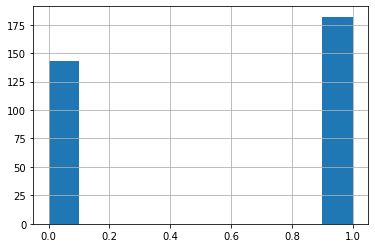

In [51]:
cluster4['Sex'].hist()

<AxesSubplot:>

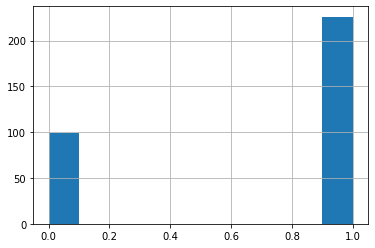

In [53]:
cluster4['Marital status'].hist()

<AxesSubplot:>

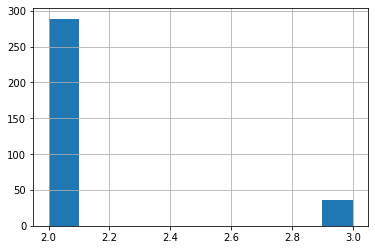

In [54]:
cluster4['Education'].hist()

<AxesSubplot:>

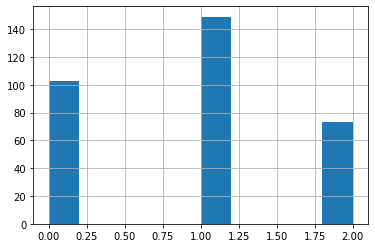

In [55]:
cluster4['Occupation'].hist()

<AxesSubplot:>

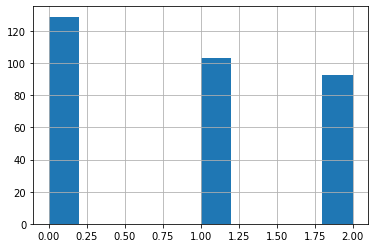

In [56]:
cluster4['Settlement size'].hist()

In [57]:
cluster4[numerical].describe()

,Age,Income
count,325.000000,325.000000
mean,54.347692,145916.258462
std,10.201929,47308.493301
min,25.000000,51882.000000
25%,46.000000,117842.000000
50%,56.000000,135830.000000
75%,63.000000,166933.000000
max,76.000000,309364.000000


## Persona cluster 4

- **Mulher**
- **56 anos**
- **Não solteira**
- **Formação universitária**
- **Mora em cidades pequenas e médias**
- **Assalariadas e nã**
- **Salário de 107K**

In [148]:
categories = df.drop(['Income', 'Age'], axis=1).columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=cluster2.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.add_trace(go.Scatterpolar(
      r=cluster3.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 3'
))

fig.add_trace(go.Scatterpolar(
      r=cluster4.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 4'
))


fig.show()

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(df.drop(['cluster', 'Cluster'], axis=1), df['Cluster'])

KeyError: "['cluster'] not found in axis"

In [108]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(df.drop(['cluster', 'Cluster'], axis=1)).values

In [113]:
shap.plots.beeswarm(shap_values)

UnboundLocalError: local variable 'values' referenced before assignment

In [111]:
shap_values

array([[[-9.57964830e-03, -4.11160564e-03,  1.94976875e-03,
          1.21973614e-03,  1.05217491e-02],
        [ 5.95304145e-03, -1.16255277e-02, -2.93202535e-03,
          1.40722212e-03,  7.19728952e-03],
        [-2.85678497e-02,  3.33243532e-02, -8.68062203e-03,
          3.75037208e-03,  1.73746501e-04],
        ...,
        [-2.79043527e-01, -1.59034728e-01, -9.12103489e-02,
         -4.02052117e-02,  5.69493816e-01],
        [ 1.42447366e-02, -3.59859428e-02, -4.67013993e-02,
         -1.61493631e-02,  8.45919687e-02],
        [-7.99064170e-03,  1.86477127e-02, -2.88059969e-02,
          6.97395617e-03,  1.11749697e-02]],

       [[ 7.30991601e-03,  5.62779976e-03,  4.98963479e-05,
         -4.60732200e-03, -8.38029011e-03],
        [ 1.68702182e-03,  1.04621709e-02,  5.06236847e-04,
         -8.08632325e-03, -4.56910628e-03],
        [ 2.01466612e-02,  1.03892348e-03,  1.23133282e-02,
          3.26775799e-03, -3.67666709e-02],
        ...,
        [-3.97095893e-01,  5.6721208

In [12]:
pipeline = Pipeline(
        [
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=4, random_state=42))
        ]
    )
#model = KMeans(n_clusters=i, random_state=42)
clusters = pipeline.fit_predict(df)

In [13]:
clusters

array([2, 0, 1, ..., 0, 0, 0])

In [14]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [15]:
pipeline.named_steps['kmeans'].inertia_

8306.787606242518